# Bitcoin and Cryptocurrencies

<p>Since the <a href="https://en.wikipedia.org/wiki/Bitcoin">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> 
We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available.)

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

dec6 = pd.read_csv("coinmarketcap_06122017.csv")

### Exploring the data

In [28]:
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [29]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

### How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

In [242]:
market_cap_raw = dec6[['id', 'market_cap_usd' ]]

market_cap_raw['id'].count()

1326

Some cryptocurrencies listed in coinmarketcap.com have no known market capitalization.These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.

In [243]:
# Filtering out the cryptocurrencies without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')
cap.reset_index()

cap['id'].count()

1031

In [244]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1031 non-null   object 
 1   market_cap_usd  1031 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.2+ KB


In [239]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap[:10]
# Calculating market capitalization percentage
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum())* 100)

In [240]:
cap10.head()

,id,market_cap_usd,market_cap_perc
0,bitcoin,2.130493e+11,56.918669
1,ethereum,4.352945e+10,11.629410
2,bitcoin-cash,2.529585e+10,6.758088
3,iota,1.475225e+10,3.941238
4,ripple,9.365343e+09,2.502063


#### Making the plot easier to read and more informative
<p>Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here.</em></p>

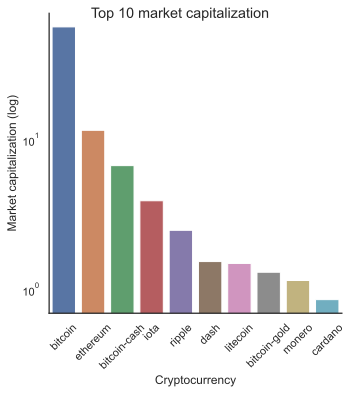

In [229]:
sns.set_theme(style="white")
g = sns.catplot(x = 'id', y = 'market_cap_perc', data = cap10,
                kind = 'bar')
g.fig.suptitle(TOP_CAP_TITLE)
g.set(xlabel = 'Cryptocurrency', ylabel = 'Market capitalization (log)')
g.set(yscale="log")
plt.xticks(rotation=45)
plt.show()

### Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change.

In [231]:
volatility = dec6[['id','percent_change_24h','percent_change_7d']]

volatility = volatility.reset_index()
volatility.dropna(inplace=True)
volatility24 = volatility.sort_values('percent_change_24h')

volatility.head()

,index,id,percent_change_24h,percent_change_7d
0,0,bitcoin,7.33,17.45
1,1,ethereum,-3.93,-7.33
2,2,bitcoin-cash,-5.51,-4.75
3,3,iota,83.35,255.82
4,4,ripple,-3.70,-14.79


### Top 10 losers and gainers in 24 hours
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

In [232]:
def top10_subplot(data, period, title) :

    sns.set_theme(style="white")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    sns.barplot(ax = axes[0], data = data[:10], x = 'id', y = period)
    sns.barplot(ax = axes[1], data = data[-10:], x = 'id', y = period)
    axes[0].tick_params(axis='x', labelrotation=45)
    axes[1].tick_params(axis='x', labelrotation=45)
    axes[0].set(xlabel = 'Cryptocurrency', ylabel = 'Percentage change')
    axes[1].set(xlabel = 'Cryptocurrency', ylabel = 'Percentage change')
    axes[0].set(title = 'Losers')
    axes[1].set(title = 'Gainers')
    fig.suptitle(title)
    return fig, axes

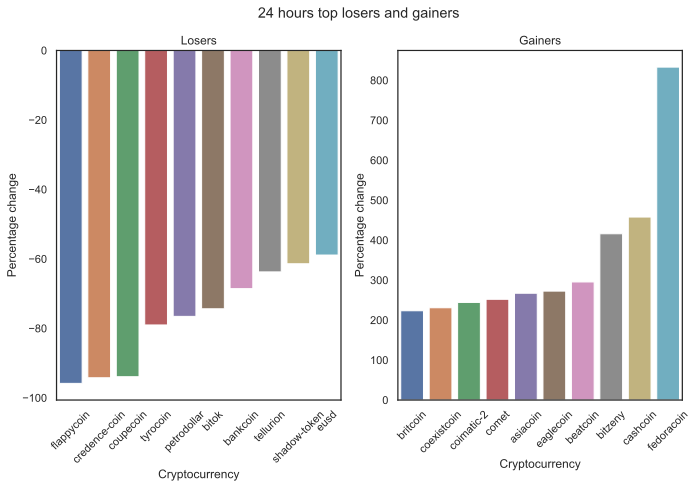

In [196]:
DTITLE = "24 hours top losers and gainers"

top10_subplot(volatility24, 'percent_change_24h', DTITLE)

plt.show()

### Weekly top losers and gainers
<p>Let's reuse the function defined above to see what is going weekly instead of daily.</p>

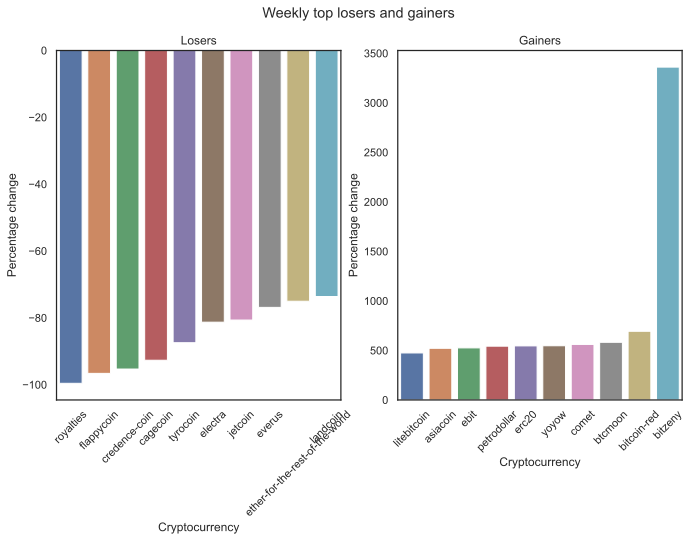

In [207]:
WTITLE = "Weekly top losers and gainers"

volatility7d = volatility.sort_values('percent_change_7d')

fig, ax = top10_subplot(volatility7d, 'percent_change_7d', WTITLE);

### How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [245]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 1E+10')

print(largecaps.id)

0         bitcoin
1        ethereum
2    bitcoin-cash
3            iota
Name: id, dtype: object


### Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>

In [233]:
cap.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [246]:
cat_cap = cap.copy()

conditions = [
    (cat_cap['market_cap_usd'] > 3E+8),
    (cat_cap['market_cap_usd']  >= 5E+7) & (cat_cap['market_cap_usd']< 3E+8),
    (cat_cap['market_cap_usd'] < 5E+7)
]

categories = ['big', 'micro', 'nano']

cat_cap['category'] = np.select(conditions, categories)

In [247]:
cat_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1031 non-null   object 
 1   market_cap_usd  1031 non-null   float64
 2   category        1031 non-null   object 
dtypes: float64(1), object(2)
memory usage: 32.2+ KB


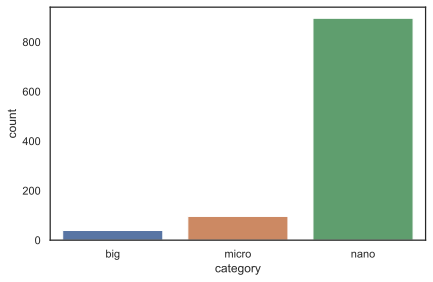

In [248]:
sns.set_theme(style="white")
g = sns.countplot(x = 'category', data = cat_cap)
plt.show()